# 선형 회귀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [1]:
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns

import datetime
from datetime import date

In [2]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = './NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

# 데이터 불러오기

In [3]:
df_stock = pd.read_csv("C:\\Users\\Hi\\JupyterProjects\\JupyterML\\Covid\\data\\covid19_kor\\주식시장_일별__20220415170553.csv", encoding='euc-kr')
df_covid = pd.read_csv("C:\\Users\\Hi\\JupyterProjects\\JupyterML\\Covid\\data\\covid19_kor\\서울특별시 코로나19 자치구별 확진자 발생동향.csv", encoding='euc-kr')

# 데이터 확인

In [4]:
df_stock.head()

,계정별,2020.02.05,2020.02.06,2020.02.07,2020.02.10,2020.02.11,2020.02.12,2020.02.13,2020.02.14,2020.02.17,...,2022.02.04,2022.02.07,2022.02.08,2022.02.09,2022.02.10,2022.02.11,2022.02.14,2022.02.15,2022.02.16,2022.02.17
0,KOSPI지수 (1980.01.04=100),2165.63,2227.94,2211.95,2201.07,2223.12,2238.38,2232.96,2243.59,2242.17,...,2750.26,2745.06,2746.47,2768.85,2771.93,2747.71,2704.48,2676.54,2729.68,2744.09
1,"거래량(주식시장, 잠정치) (만주)",56312.00,68323.00,76671.00,60047.00,51031.00,62342.00,62961.00,58900.00,45309.00,...,52652.00,41008.00,55489.00,52969.00,50043.00,45698.00,60566.00,57535.00,41515.00,60226.00
2,"거래대금(주식시장 , 잠정치) (억원)",74625.00,80636.00,69263.00,53322.00,64744.00,67750.00,79571.00,61331.00,55661.00,...,111842.00,111059.00,116203.00,101579.00,125638.00,105400.00,113138.00,92255.00,82633.00,116773.00
3,"외국인 순매수(주식시장, 잠정치) (억원)",4578.00,1586.00,223.00,-3039.00,-934.00,-2163.00,2795.00,945.00,-2287.00,...,1945.00,-69.00,-939.00,2355.00,8365.00,6081.00,684.00,-2209.00,-437.00,6516.00
4,"주식시장-거래량(만주, 시간외거래분 포함) (만주)",57440.00,69522.00,80034.00,60957.00,52621.00,63246.00,63867.00,59722.00,45825.00,...,53615.00,41784.00,56053.00,53912.00,50961.00,48052.00,61634.00,58904.00,42237.00,-


In [5]:
df_covid.head()

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,2022.02.17.00,6850,246,6313,221,10242,405,11930,804,15729,...,17646,784,25413,1169,28864,1218,20800,1064,31146,1254
1,2022.02.16.00,6604,227,6092,179,9837,340,11126,639,14865,...,16862,764,24244,1040,27646,1356,19736,1180,29892,898
2,2022.02.15.00,6377,182,5913,136,9497,218,10487,316,14122,...,16098,440,23204,819,26290,682,18556,528,28994,844
3,2022.02.14.00,6195,96,5777,91,9279,256,10171,336,13669,...,15658,386,22385,632,25608,726,18028,588,28150,735
4,2022.02.13.00,6099,184,5686,111,9023,248,9835,408,13192,...,15272,430,21753,747,24882,800,17440,664,27416,728


# Covid

In [6]:
df_covid_num = df_covid.drop(['자치구 기준일'], axis = 1)

In [7]:
df_covid_num.head()

,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,광진구 추가,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,6850,246,6313,221,10242,405,11930,804,15729,864,...,17646,784,25413,1169,28864,1218,20800,1064,31146,1254
1,6604,227,6092,179,9837,340,11126,639,14865,743,...,16862,764,24244,1040,27646,1356,19736,1180,29892,898
2,6377,182,5913,136,9497,218,10487,316,14122,453,...,16098,440,23204,819,26290,682,18556,528,28994,844
3,6195,96,5777,91,9279,256,10171,336,13669,477,...,15658,386,22385,632,25608,726,18028,588,28150,735
4,6099,184,5686,111,9023,248,9835,408,13192,448,...,15272,430,21753,747,24882,800,17440,664,27416,728


In [8]:
# 서울 전체구 데이터 병합
df_covid_num = df_covid_num.sum(axis = 1)

In [9]:
df_covid_num.head()

0    468666
1    448168
2    422863
3    409556
4    398182
dtype: int64

In [10]:
df_covid_num = df_covid_num.to_frame()
df_covid_num.columns = ['서울 전체']

In [11]:
df_covid_num.head()

,서울 전체
0,468666
1,448168
2,422863
3,409556
4,398182


In [12]:
df_covid = pd.concat([df_covid['자치구 기준일'], df_covid_num], axis = 1)

In [13]:
df_covid.head()

,자치구 기준일,서울 전체
0,2022.02.17.00,468666
1,2022.02.16.00,448168
2,2022.02.15.00,422863
3,2022.02.14.00,409556
4,2022.02.13.00,398182


In [14]:
# 데이터 전처리 - 날짜 형식 변환
date_set=[]
remove_set = ['2020-04-15', '2020-04-30', '2020-05-01', '2020-05-05', '2020-08-17', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-09', '2020-12-25', '2020-12-31', '2021-01-01', '2021-02-11', '2021-02-12', '2021-03-01', '2021-05-05', '2021-05-19', '2021-08-16', '2021-09-20', '2021-09-21', '2021-09-22', '2021-10-04', '2021-10-11', '2021-12-31', '2022-01-31', '2022-02-01', '2022-02-02']
for item in df_covid['자치구 기준일']:
    break_flag = 1
    # print(item)
    item=item.split('.')
    year=int(item[0])
    month=int(item[1])
    day=int(item[2])
    for remove_data in remove_set:
        if(remove_data == str(date(year, month, day)) or date(year, month, day).weekday() > 4):
            date_set+=[np.nan]
            break_flag = 0
            break
    if(break_flag == 1):
        date_set+=[str(date(year,month,day))]
        
df_covid['자치구 기준일'] = date_set

df_covid.dropna(axis=0, inplace = True)
df_covid = df_covid.drop_duplicates(['자치구 기준일'])
df_covid["서울 전체"]=df_covid["서울 전체"].apply(float)
df_covid = df_covid.sort_values('자치구 기준일', ascending = True)

In [15]:
# 확인용 코드
print(len(remove_set))

27


In [16]:
# 확인용 코드
df_covid['자치구 기준일']

744    2020-02-05
743    2020-02-06
742    2020-02-07
739    2020-02-10
738    2020-02-11
          ...    
6      2022-02-11
3      2022-02-14
2      2022-02-15
1      2022-02-16
0      2022-02-17
Name: 자치구 기준일, Length: 505, dtype: object

In [17]:
# 확인용 코드
df_covid.head(3)

,자치구 기준일,서울 전체
744,2020-02-05,12.0
743,2020-02-06,15.0
742,2020-02-07,0.0


In [18]:
# 확인용 코드
df_covid.tail(3)

,자치구 기준일,서울 전체
2,2022-02-15,422863.0
1,2022-02-16,448168.0
0,2022-02-17,468666.0


In [19]:
# 확인용 코드
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 744 to 0
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구 기준일  505 non-null    object 
 1   서울 전체    505 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.8+ KB


In [20]:
# 오미크론 우세종 된 이후 데이터 제거
df_covid = df_covid[df_covid['자치구 기준일'] < '2022-01-09']

In [21]:
df_covid

,자치구 기준일,서울 전체
744,2020-02-05,12.0
743,2020-02-06,15.0
742,2020-02-07,0.0
739,2020-02-10,0.0
738,2020-02-11,0.0
...,...,...
45,2022-01-03,229860.0
44,2022-01-04,230739.0
43,2022-01-05,232625.0
42,2022-01-06,233627.0


In [22]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 744 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구 기준일  479 non-null    object 
 1   서울 전체    479 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.2+ KB


# Stock

In [23]:
# 확인용 코드
df_stock.head()

,계정별,2020.02.05,2020.02.06,2020.02.07,2020.02.10,2020.02.11,2020.02.12,2020.02.13,2020.02.14,2020.02.17,...,2022.02.04,2022.02.07,2022.02.08,2022.02.09,2022.02.10,2022.02.11,2022.02.14,2022.02.15,2022.02.16,2022.02.17
0,KOSPI지수 (1980.01.04=100),2165.63,2227.94,2211.95,2201.07,2223.12,2238.38,2232.96,2243.59,2242.17,...,2750.26,2745.06,2746.47,2768.85,2771.93,2747.71,2704.48,2676.54,2729.68,2744.09
1,"거래량(주식시장, 잠정치) (만주)",56312.00,68323.00,76671.00,60047.00,51031.00,62342.00,62961.00,58900.00,45309.00,...,52652.00,41008.00,55489.00,52969.00,50043.00,45698.00,60566.00,57535.00,41515.00,60226.00
2,"거래대금(주식시장 , 잠정치) (억원)",74625.00,80636.00,69263.00,53322.00,64744.00,67750.00,79571.00,61331.00,55661.00,...,111842.00,111059.00,116203.00,101579.00,125638.00,105400.00,113138.00,92255.00,82633.00,116773.00
3,"외국인 순매수(주식시장, 잠정치) (억원)",4578.00,1586.00,223.00,-3039.00,-934.00,-2163.00,2795.00,945.00,-2287.00,...,1945.00,-69.00,-939.00,2355.00,8365.00,6081.00,684.00,-2209.00,-437.00,6516.00
4,"주식시장-거래량(만주, 시간외거래분 포함) (만주)",57440.00,69522.00,80034.00,60957.00,52621.00,63246.00,63867.00,59722.00,45825.00,...,53615.00,41784.00,56053.00,53912.00,50961.00,48052.00,61634.00,58904.00,42237.00,-


In [24]:
# 데이터 전처리 - 전치 + 날짜 형식 변환
df_stock_day = df_stock.columns.values.tolist()
df_stock = df_stock.T
df_stock['날짜'] = df_stock_day

In [25]:
date_set=[]
for item in df_stock['날짜']:
    if(item == '계정별'):
        date_set+=[np.nan]
    else:
        item=item.split('.')
        year=int(item[0])
        month=int(item[1])
        day=int(item[2])
        date_set+=[str(date(year,month,day))]

df_stock['날짜'] = date_set

df_stock.dropna(axis=0, inplace = True)
df_stock.rename(columns={0:'KOSPI'}, inplace = True)
df_stock = df_stock[['KOSPI', '날짜']]
df_stock["KOSPI"]=df_stock["KOSPI"].apply(float)
df_stock = df_stock.sort_values('날짜', ascending = True)

In [26]:
# 확인용 코드
df_stock.head(3)

,KOSPI,날짜
2020.02.05,2165.63,2020-02-05
2020.02.06,2227.94,2020-02-06
2020.02.07,2211.95,2020-02-07


In [27]:
# 확인용 코드
df_stock.tail(3)

,KOSPI,날짜
2022.02.15,2676.54,2022-02-15
2022.02.16,2729.68,2022-02-16
2022.02.17,2744.09,2022-02-17


In [28]:
df_stock = df_stock[df_stock['날짜'] < '2022-01-09']

In [29]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 2020.02.05 to 2022.01.07
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOSPI   479 non-null    float64
 1   날짜      479 non-null    object 
dtypes: float64(1), object(1)
memory usage: 11.2+ KB


In [30]:
# 확인용 코드
df_covid.head(3)

,자치구 기준일,서울 전체
744,2020-02-05,12.0
743,2020-02-06,15.0
742,2020-02-07,0.0


In [31]:
# 확인용 코드
df_covid.tail(3)

,자치구 기준일,서울 전체
43,2022-01-05,232625.0
42,2022-01-06,233627.0
41,2022-01-07,234495.0


In [32]:
# 확인용 코드
list1 = list(np.array(df_covid['자치구 기준일'].tolist()))
print(len(set(list1)))

479


In [33]:
# 확인용 코드
list2 = list(np.array(df_stock['날짜'].tolist()))
print(len(set(list1)))

479


In [34]:
# 확인용 코드
C = list(set(list1) - set(list2))
D = list(set(list2) - set(list1))
print(C)
print(D)

[]
[]


In [35]:
# 확인용 코드
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 2020.02.05 to 2022.01.07
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOSPI   479 non-null    float64
 1   날짜      479 non-null    object 
dtypes: float64(1), object(1)
memory usage: 11.2+ KB


In [36]:
# 확인용 코드
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 744 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구 기준일  479 non-null    object 
 1   서울 전체    479 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.2+ KB


# 시각화

In [37]:
import matplotlib.pyplot as plt

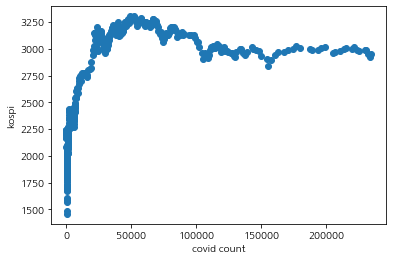

In [38]:
# 시각화
df_covid_count = df_covid['서울 전체']
df_kospi = df_stock['KOSPI']
plt.scatter(df_covid_count, df_kospi)
plt.xlabel('covid count')
plt.ylabel('kospi')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# 데이터셋 분류
train_input, test_input, train_target, test_target = train_test_split(
    df_covid_count, df_kospi,  random_state=42)

In [41]:
print(train_input.shape, test_input.shape)

(359,) (120,)


In [42]:
# 데이터셋 전처리
train_input = train_input.values.reshape(-1, 1)
test_input = test_input.values.reshape(-1, 1)

In [43]:
print(train_input.shape, test_input.shape)

(359, 1) (120, 1)


## 선형 회귀

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [45]:
# 선형 회귀 모델 선정 & 훈련
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [46]:
# 30만명 코로나 결과 예측
print(lr.predict([[300000]]))

[4042.38153092]


In [47]:
# 파라미터 출력
print(lr.coef_, lr.intercept_)

[0.00513486] 2501.924312158931


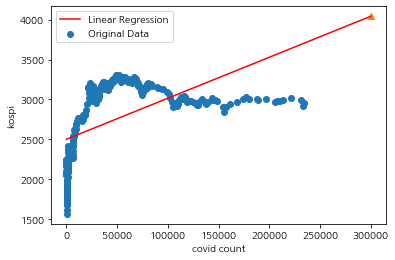

linear_train_accuracy : 0.3005638064688242
linear_test_accuracy : 0.29437491100768676
MAE : 378.720
MSE : 185470.893
RMSE : 430.663


In [48]:
# 시각화
plt.scatter(train_input, train_target, label='Original Data')
# 0 ~ 30만 코로나 범위 1차 방정식 그래프
plt.plot([0, 300000], [0*lr.coef_+lr.intercept_, 300000*lr.coef_+lr.intercept_], 'r', label='Linear Regression')
# 30만명 코로나 데이터 시각화
plt.scatter(300000, lr.predict([[300000]]), marker='^')
plt.xlabel('covid count')
plt.ylabel('kospi')
plt.legend()
plt.show()

# 결과 예측 by 테스트 데이터
test_prediction = lr.predict(test_input)

# 모델분석(결정계수) by 테스트 데이터 & 테스트 데이터
print("linear_train_accuracy :", end = ' ')
print(lr.score(train_input, train_target))
print("linear_test_accuracy :", end = ' ')
print(lr.score(test_input, test_target))

# 평균 오차 계산 by 테스트 데이터
mae = mean_absolute_error(test_target, test_prediction)
mse = mean_squared_error(test_target, test_prediction)
rmse = np.sqrt(mse)
print('MAE : {0:.3f}'.format(mae))
print('MSE : {0:.3f}'.format(mse))
print('RMSE : {0:.3f}'.format(rmse))

## 다항 회귀

### 2차 그래프

In [49]:
# 데이터셋 전처리
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [50]:
print(train_poly.shape, test_poly.shape)

(359, 2) (120, 2)


In [51]:
# 선형 회귀 모델 선정 & 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 30만명 코로나 결과 예측
print(lr.predict([[300000**2, 300000]]))

[486.95068321]


In [52]:
# 파라미터 출력
print(lr.coef_, lr.intercept_)

[-8.52894134e-08  1.96070987e-02] 2280.868284677109


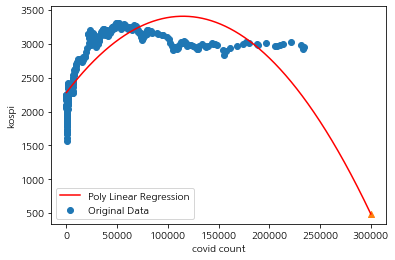

poly_train_accuracy : 0.657138830281127
poly_test_accuracy : 0.6320321425918017
MAE : 260.658
MSE : 96718.963
RMSE : 310.997


In [53]:
# 시각화
plt.scatter(train_input, train_target, label='Original Data')
# 0 ~ 30만 코로나 범위 2차 방정식 그래프
# point = np.arange(0, 300000, 1)
point = np.linspace(0, 300000, 300000)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_, 'r', label='Poly Linear Regression')
# 30만명 코로나 데이터 시각화
plt.scatter([300000], [lr.predict([[300000**2, 300000]])], marker='^')
plt.xlabel('covid count')
plt.ylabel('kospi')
plt.legend()
plt.show()

# 결과 예측 by 테스트 데이터
test_prediction = lr.predict(test_poly)

# 모델분석(결정계수) by 테스트 데이터 & 테스트 데이터
print("poly_train_accuracy :", end = ' ')
print(lr.score(train_poly, train_target))
print("poly_test_accuracy :", end = ' ')
print(lr.score(test_poly, test_target))

# 평균 오차 계산 by 테스트 데이터
mae = mean_absolute_error(test_target, test_prediction)
mse = mean_squared_error(test_target, test_prediction)
rmse = np.sqrt(mse)
print('MAE : {0:.3f}'.format(mae))
print('MSE : {0:.3f}'.format(mse))
print('RMSE : {0:.3f}'.format(rmse))

### 모듈 이용

일차 단항식 계수 피처 :  [1012.]
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  2
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2280.8682846794177
coefficient :  [ 0.00000000e+00  1.96070987e-02 -8.52894134e-08]

train accuracy :  0.657138830281127
test accuracy :  0.6320321425877828
MAE : 260.658
MSE : 96718.963
RMSE : 310.997
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  3
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2122.424632283941
coefficient :  [ 0.00000000e+00  4.05403772e-02 -4.04259141e-07  1.08819204e-12]



C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/1698556570.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)
C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/1698556570.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)


train accuracy :  0.8812716872853991
test accuracy :  0.8739738143272043
MAE : 135.906
MSE : 33125.508
RMSE : 182.004
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  4
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2408.7283867576352
coefficient :  [ 0.00000000e+00  1.75260248e-11  4.43892737e-07 -4.63150332e-12
  1.20994805e-17]

train accuracy :  0.5167381425446813
test accuracy :  0.5233392836506359
MAE : 304.477
MSE : 125288.471
RMSE : 353.961
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  5
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2561.359576130093
coefficient :  [ 0.00000000e+00  5.18843182e-17  5.25022878e-17  2.68655811e-12
 -2.67977620e-17  6.67392205e-23]



C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/1698556570.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)
C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/1698556570.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)


train accuracy :  0.2333744316585894
test accuracy :  0.27217467339504553
MAE : 378.669
MSE : 191306.142
RMSE : 437.386
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  8
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2665.429023042978
coefficient :  [ 0.00000000e+00 -7.23045354e-32 -3.46468120e-39  6.27781712e-43
  6.77178665e-38  6.13719091e-33  3.77735938e-28 -3.42485187e-33
  7.78481805e-39]

train accuracy :  0.05340404476370053
test accuracy :  0.0688436841375496
MAE : 432.482
MSE : 244750.926
RMSE : 494.723
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  10
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2680.2538823171476
coefficient :  [ 0.00000000e+00 -3.86929021e-42 -1.72603781e-49  2.59509953e-75
  1.89852951e-58  1.51174604e-53  1.72446674e-48  1.66170304e-43
  1.08092303e-38 -9.64453731e-44  2.15490538e-49]



C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/1698556570.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)
C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/1698556570.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)


train accuracy :  0.034316468047197346
test accuracy :  0.035091745023590026
MAE : 444.775
MSE : 253622.495
RMSE : 503.609
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  20
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2699.3203960331584
coefficient :  [ 0.00000000e+000  4.39205109e-095 -9.38362428e-102  8.04205208e-182
  9.09596575e-164  4.31784224e-159  5.40994841e-129  2.24533992e-132
  2.51229576e-143  3.50513871e-138  7.69391368e-133  1.31153708e-127
  2.18091869e-122  3.50821035e-117  5.39072820e-112  7.75314396e-107
  1.00626786e-101  1.09110440e-096  7.90616093e-092 -6.88283231e-097
  1.49867514e-102]



C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/1698556570.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)


train accuracy :  0.012603471346509298
test accuracy :  0.004095750178606861
MAE : 452.815
MSE : 261769.676
RMSE : 511.634
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  30
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2702.779016297144
coefficient :  [-2.15218784e-149  4.47266258e-148 -6.08253884e-155  7.11282800e-161
  2.84809832e-270  1.12135538e-265  2.25088078e-260  4.50391124e-255
  8.98607484e-250  1.78749249e-244  3.54382568e-239  6.99924156e-234
  1.37632974e-228  2.69261720e-223  5.23640837e-218  1.01123271e-212
  1.93680493e-207  3.67345690e-202  6.88642382e-197  1.27290693e-191
  2.31274191e-186  4.11317415e-181  7.11959616e-176  1.18956047e-170
  1.89478845e-165  2.81961605e-160  3.77978079e-155  4.22624018e-150
  3.15304767e-145 -2.71041430e-150  5.82671610e-156]



C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/1698556570.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)


train accuracy :  0.00857389041572243
test accuracy :  -0.001164492713292109
MAE : 455.528
MSE : 263152.311
RMSE : 512.984


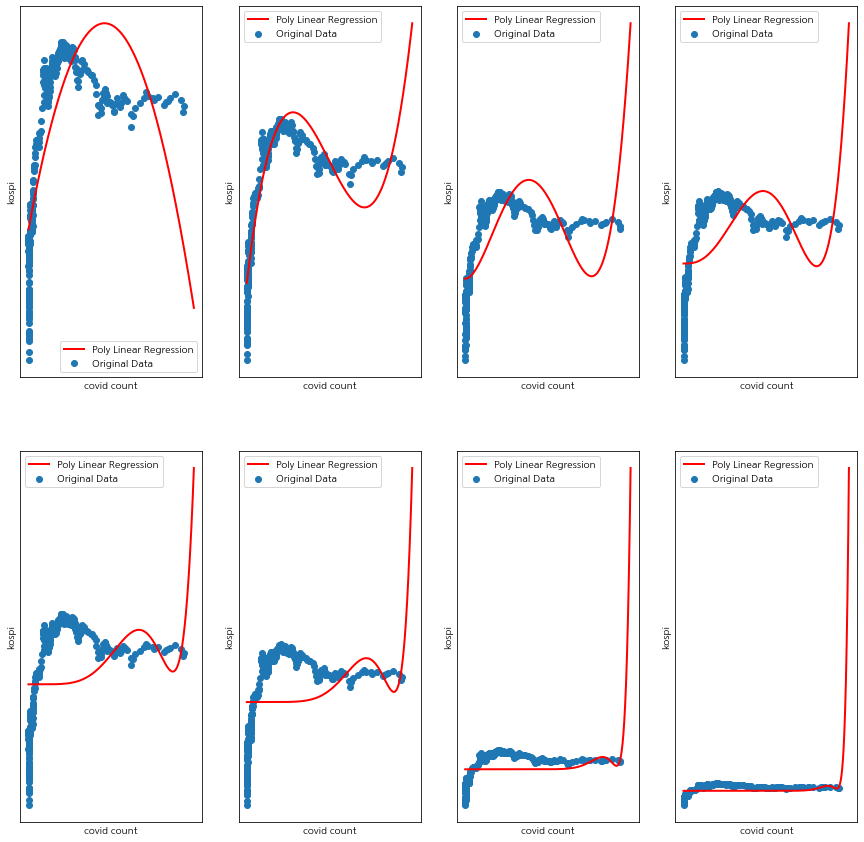

In [54]:
# 다항식
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 다항식 변환
print('일차 단항식 계수 피처 : ', train_input[0])
fig = plt.figure(figsize = (15, 15))

degrees = [2, 3, 4, 5, 8, 10, 20, 30]

# 다항식 시각화
for i in range(len(degrees)):
    print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
    print("degrees : ", degrees[i])
    print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
    ax = plt.subplot(2, len(degrees)/2, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    poly_features = PolynomialFeatures(degree=degrees[i], include_bias = True)
    train_poly = poly_features.fit_transform(train_input)
    test_poly = poly_features.transform(test_input)

    # 선형 회귀 모델 선정 & 훈련
    lr = LinearRegression()
    lr.fit(train_poly, train_target)

    # 파라미터 출력
    print("intercept : ", lr.intercept_)
    print("coefficient : ", lr.coef_)
    print()

    # 시각화
    plt.scatter(train_input, train_target, label="Original Data")

    # 예측값 곡선
    X_new = np.linspace(0, 250000, 250000).reshape(250000, 1)
    X_new_poly = poly_features.transform(X_new)
    y_new = lr.predict(X_new_poly)
    
    # 실제 값 곡선
    plt.plot(X_new, y_new, "r", linewidth=2, label="Poly Linear Regression")
    plt.xlabel('covid count')
    plt.ylabel('kospi')
    plt.legend()

    # 결과 예측 by 테스트 데이터
    test_prediction = lr.predict(test_poly)

    # 모델분석(결정계수) by 테스트 데이터 & 테스트 데이터
    print("train accuracy : ", lr.score(train_poly, train_target))
    print("test accuracy : ", lr.score(test_poly, test_target))

    # 평균 오차 계산 by 테스트 데이터
    mae = mean_absolute_error(test_target, test_prediction)
    mse = mean_squared_error(test_target, test_prediction)
    rmse = np.sqrt(mse)
    print('MAE : {0:.3f}'.format(mae))
    print('MSE : {0:.3f}'.format(mse))
    print('RMSE : {0:.3f}'.format(rmse))
    
plt.show()

# Standard Scaler

## Small N

일차 단항식 계수 피처 :  [1012.]
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  2
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2710.088384401114
coefficient :  [   0.         1008.11901271 -797.73755602]

train accuracy :  0.657138830281127
test accuracy :  0.6320321425918023
MAE : 260.658
MSE : 96718.963
RMSE : 310.997
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  3
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2710.0883844011137
coefficient :  [    0.          2084.43055501 -3781.15786029  2029.9778419 ]

train accuracy :  0.8812716876127169
test accuracy :  0.873976018232921
MAE : 135.905
MSE : 33124.928
RMSE : 182.003
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  4
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ


C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/737960926.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)
C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/737960926.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)
C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/737960926.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)


intercept :  2710.088384401113
coefficient :  [    0.          2987.29327398 -8428.85667889  9641.76680013
 -3886.03775469]

train accuracy :  0.9386952011606157
test accuracy :  0.9286569326592731
MAE : 94.271
MSE : 18752.256
RMSE : 136.939
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  5
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2710.0883844011146
coefficient :  [     0.           3528.9937998  -12553.6580455   20940.85253876
 -16767.84839259   5180.86123501]

train accuracy :  0.9465021874678955
test accuracy :  0.9366180517925599
MAE : 86.715
MSE : 16659.706
RMSE : 129.072
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  8
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ


C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/737960926.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)
C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/737960926.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)


intercept :  2710.0883844014397
coefficient :  [      0.            5093.82828489  -35570.86363102  164977.75441755
 -491601.14403477  895142.15323606 -954249.63306969  545632.05807351
 -129075.45224342]

train accuracy :  0.9525517329783892
test accuracy :  0.9465057964123398
MAE : 75.606
MSE : 14060.750
RMSE : 118.578
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  10
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2710.0883844039176
coefficient :  [ 0.00000000e+00  5.52194063e+03 -4.69358335e+04  2.88503679e+05
 -1.19492125e+06  3.23017022e+06 -5.70534107e+06  6.54225780e+06
 -4.70127353e+06  1.92581199e+06 -3.43443472e+05]



C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/737960926.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)
C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/737960926.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)


train accuracy :  0.9529408665618746
test accuracy :  0.9471346947636007
MAE : 74.355
MSE : 13895.446
RMSE : 117.879
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  20
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2710.054465491021
coefficient :  [ 0.00000000e+00  7.58065855e+03 -1.00384468e+05 -2.09293753e+06
  1.34026245e+08 -2.86521615e+09  3.54536712e+10 -2.91881925e+11
  1.71045649e+12 -7.42484405e+12  2.44820547e+13 -6.22842653e+13
  1.23303308e+14 -1.90406189e+14  2.28516569e+14 -2.10913356e+14
  1.46790686e+14 -7.44954684e+13  2.60075878e+13 -5.58266644e+12
  5.55287357e+11]

train accuracy :  0.955743900528744
test accuracy :  0.9489907002704706
MAE : 74.767
MSE : 13407.602
RMSE : 115.791
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  30
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2710.0829378350572
coefficient :  [-4.28638621e+10  7.58472383e+03 -1.01232044e+05 -2.01692090e+06
  1.30300761e+08 -2.75809584e+09  3.34975021e+10 -2.67702259e+11
  1.49857570e+12 -6.06517925e+12  1.79514156e+13 -3.84981411e+13
  5.729

C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/737960926.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)
C:\Users\Hi\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


train accuracy :  0.9557353534442933
test accuracy :  0.9490450825683923
MAE : 74.553
MSE : 13393.308
RMSE : 115.729


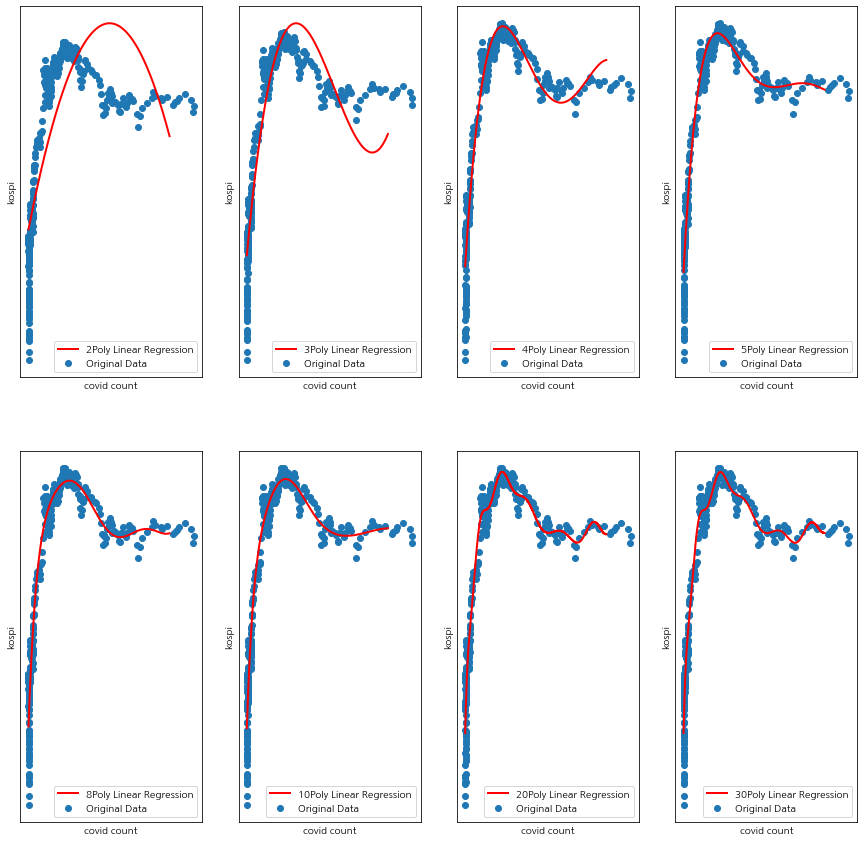

In [55]:
# 다항식
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 다항식 변환
print('일차 단항식 계수 피처 : ', train_input[0])
fig = plt.figure(figsize = (15, 15))

degrees = [2, 3, 4, 5, 8, 10, 20, 30]

# 다항식 시각화
for i in range(len(degrees)):
    print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
    print("degrees : ", degrees[i])
    print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
    ax = plt.subplot(2, len(degrees)/2, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    poly_features = PolynomialFeatures(degree=degrees[i], include_bias = True)
    train_poly = poly_features.fit_transform(train_input)
    test_poly = poly_features.transform(test_input)
    
    ss = StandardScaler()
    ss.fit(train_poly)
    
    train_scaled = ss.transform(train_poly)
    test_scaled = ss.transform(test_poly)

    # 선형 회귀 모델 선정 & 훈련
    lr = LinearRegression()
    lr.fit(train_scaled, train_target)

    # 파라미터 출력
    print("intercept : ", lr.intercept_)
    print("coefficient : ", lr.coef_)
    print()

    # 시각화
    plt.scatter(train_input, train_target, label="Original Data")

    # 예측값 곡선
    X_new = np.linspace(0, 200000, 200000).reshape(200000, 1)
    X_new_poly = poly_features.transform(X_new)
    X_new_scaled = ss.transform(X_new_poly)
    y_new = lr.predict(X_new_scaled)
    
    # 실제 값 곡선
    plt.plot(X_new, y_new, "r", linewidth=2, label=str(degrees[i]) + "Poly Linear Regression")
    plt.xlabel('covid count')
    plt.ylabel('kospi')
    plt.legend()

    # 결과 예측 by 테스트 데이터
    test_prediction = lr.predict(test_scaled)

    # 모델분석(결정계수) by 테스트 데이터 & 테스트 데이터
    print("train accuracy : ", lr.score(train_scaled, train_target))
    print("test accuracy : ", lr.score(test_scaled, test_target))

    # 평균 오차 계산 by 테스트 데이터
    mae = mean_absolute_error(test_target, test_prediction)
    mse = mean_squared_error(test_target, test_prediction)
    rmse = np.sqrt(mse)
    print('MAE : {0:.3f}'.format(mae))
    print('MSE : {0:.3f}'.format(mse))
    print('RMSE : {0:.3f}'.format(rmse))
    
plt.show()

## Big N

일차 단항식 계수 피처 :  [1012.]
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  2
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2710.088384401114
coefficient :  [   0.         1008.11901271 -797.73755602]

train accuracy :  0.657138830281127
test accuracy :  0.6320321425918023
MAE : 260.658
MSE : 96718.963
RMSE : 310.997
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  3
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2710.0883844011137
coefficient :  [    0.          2084.43055501 -3781.15786029  2029.9778419 ]



C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/3853157450.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)
C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/3853157450.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)


train accuracy :  0.8812716876127169
test accuracy :  0.873976018232921
MAE : 135.905
MSE : 33124.928
RMSE : 182.003
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  4
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2710.088384401113
coefficient :  [    0.          2987.29327398 -8428.85667889  9641.76680013
 -3886.03775469]

train accuracy :  0.9386952011606157
test accuracy :  0.9286569326592731
MAE : 94.271
MSE : 18752.256
RMSE : 136.939
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  5
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2710.0883844011146
coefficient :  [     0.           3528.9937998  -12553.6580455   20940.85253876
 -16767.84839259   5180.86123501]



C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/3853157450.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)
C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/3853157450.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)


train accuracy :  0.9465021874678955
test accuracy :  0.9366180517925599
MAE : 86.715
MSE : 16659.706
RMSE : 129.072
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  8
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2710.0883844014397
coefficient :  [      0.            5093.82828489  -35570.86363102  164977.75441755
 -491601.14403477  895142.15323606 -954249.63306969  545632.05807351
 -129075.45224342]

train accuracy :  0.9525517329783892
test accuracy :  0.9465057964123398
MAE : 75.606
MSE : 14060.750
RMSE : 118.578
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  10
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ


C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/3853157450.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)
C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/3853157450.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)


intercept :  2710.0883844039176
coefficient :  [ 0.00000000e+00  5.52194063e+03 -4.69358335e+04  2.88503679e+05
 -1.19492125e+06  3.23017022e+06 -5.70534107e+06  6.54225780e+06
 -4.70127353e+06  1.92581199e+06 -3.43443472e+05]

train accuracy :  0.9529408665618746
test accuracy :  0.9471346947636007
MAE : 74.355
MSE : 13895.446
RMSE : 117.879
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  20
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ


C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/3853157450.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)


intercept :  2710.054465491021
coefficient :  [ 0.00000000e+00  7.58065855e+03 -1.00384468e+05 -2.09293753e+06
  1.34026245e+08 -2.86521615e+09  3.54536712e+10 -2.91881925e+11
  1.71045649e+12 -7.42484405e+12  2.44820547e+13 -6.22842653e+13
  1.23303308e+14 -1.90406189e+14  2.28516569e+14 -2.10913356e+14
  1.46790686e+14 -7.44954684e+13  2.60075878e+13 -5.58266644e+12
  5.55287357e+11]

train accuracy :  0.955743900528744
test accuracy :  0.9489907002704706
MAE : 74.767
MSE : 13407.602
RMSE : 115.791
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  30
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
intercept :  2710.0829378350572
coefficient :  [-4.28638621e+10  7.58472383e+03 -1.01232044e+05 -2.01692090e+06
  1.30300761e+08 -2.75809584e+09  3.34975021e+10 -2.67702259e+11
  1.49857570e+12 -6.06517925e+12  1.79514156e+13 -3.84981411e+13
  5.72971164e+13 -5.15081891e+13  1.08146321e+13  3.28903665e+13
 -3.02223939e+13 -1.31252218e+13  3.12504819e+13  2.19578342e+12
 -2.87044018e+13  4.90077434e+12  2.57531847e+13 -1.381031

C:\Users\Hi\AppData\Local\Temp/ipykernel_17580/3853157450.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(degrees)/2, i + 1)
C:\Users\Hi\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


train accuracy :  0.9557353534442933
test accuracy :  0.9490450825683923
MAE : 74.553
MSE : 13393.308
RMSE : 115.729


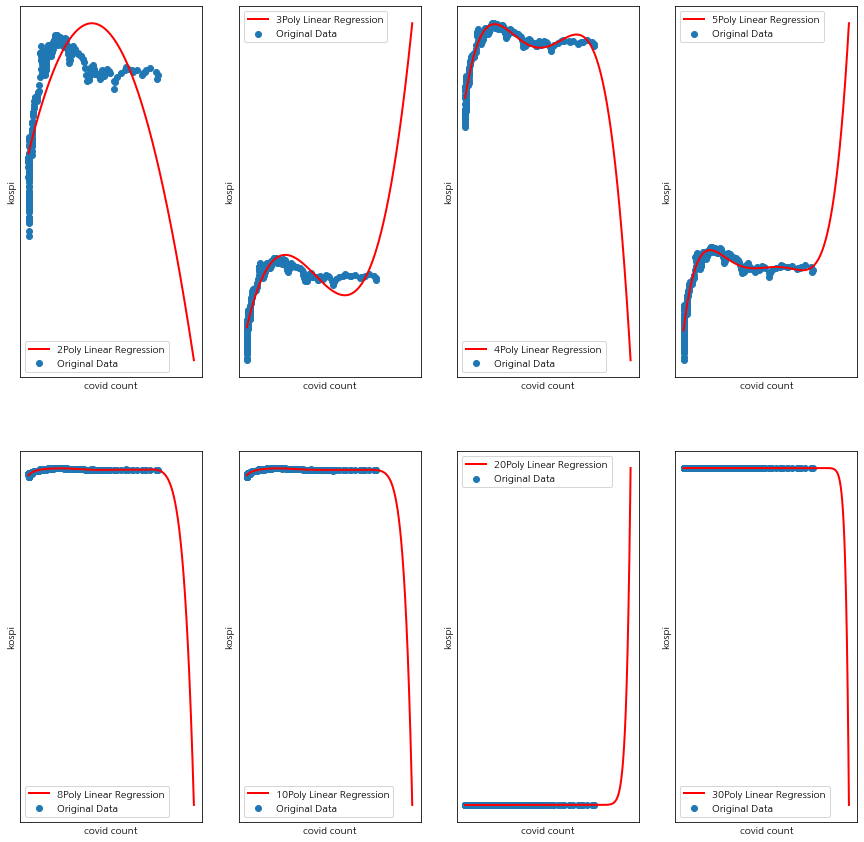

In [56]:
# 다항식
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 다항식 변환
print('일차 단항식 계수 피처 : ', train_input[0])
fig = plt.figure(figsize = (15, 15))

degrees = [2, 3, 4, 5, 8, 10, 20, 30]

# 다항식 시각화
for i in range(len(degrees)):
    print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
    print("degrees : ", degrees[i])
    print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
    ax = plt.subplot(2, len(degrees)/2, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    poly_features = PolynomialFeatures(degree=degrees[i], include_bias = True)
    train_poly = poly_features.fit_transform(train_input)
    test_poly = poly_features.transform(test_input)
    
    ss = StandardScaler()
    ss.fit(train_poly)
    
    train_scaled = ss.transform(train_poly)
    test_scaled = ss.transform(test_poly)

    # 선형 회귀 모델 선정 & 훈련
    lr = LinearRegression()
    lr.fit(train_scaled, train_target)

    # 파라미터 출력
    print("intercept : ", lr.intercept_)
    print("coefficient : ", lr.coef_)
    print()

    # 시각화
    plt.scatter(train_input, train_target, label="Original Data")

    # 예측값 곡선
    X_new = np.linspace(0, 300000, 300000).reshape(300000, 1)
    X_new_poly = poly_features.transform(X_new)
    X_new_scaled = ss.transform(X_new_poly)
    y_new = lr.predict(X_new_scaled)
    
    # 실제 값 곡선
    plt.plot(X_new, y_new, "r", linewidth=2, label=str(degrees[i]) + "Poly Linear Regression")
    plt.xlabel('covid count')
    plt.ylabel('kospi')
    plt.legend()

    # 결과 예측 by 테스트 데이터
    test_prediction = lr.predict(test_scaled)

    # 모델분석(결정계수) by 테스트 데이터 & 테스트 데이터
    print("train accuracy : ", lr.score(train_scaled, train_target))
    print("test accuracy : ", lr.score(test_scaled, test_target))

    # 평균 오차 계산 by 테스트 데이터
    mae = mean_absolute_error(test_target, test_prediction)
    mse = mean_squared_error(test_target, test_prediction)
    rmse = np.sqrt(mse)
    print('MAE : {0:.3f}'.format(mae))
    print('MSE : {0:.3f}'.format(mse))
    print('RMSE : {0:.3f}'.format(rmse))
    
plt.show()

# K-Fold

In [57]:
from sklearn.model_selection import cross_val_score, cross_validate
import numpy as np

# 다항식
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 다항식 변환
print('일차 단항식 계수 피처 : ', train_input[0])
fig = plt.figure(figsize = (15, 15))

degrees = list(range(2, 31))

# 다항식 시각화
for i in range(len(degrees)):
    print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
    print("degrees : ", degrees[i])
    print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")

    poly_features = PolynomialFeatures(degree=degrees[i], include_bias = True)
    train_poly = poly_features.fit_transform(train_input)
    test_poly = poly_features.transform(test_input)
    
    ss = StandardScaler()
    ss.fit(train_poly)
    
    train_scaled = ss.transform(train_poly)
    test_scaled = ss.transform(test_poly)

    # 선형 회귀 모델 선정 & 훈련
    lr = LinearRegression()
    scores = cross_val_score(lr, np.concatenate([train_scaled, test_scaled], 0), 
                             np.concatenate([train_target, test_target], 0), cv=10)

    print(f"한 번씩 검증 때마다 accuracy : {scores}")
    print()
    print(f"5번 모두 검증한 accuracy 총 평균 : {np.mean(scores)}")

일차 단항식 계수 피처 :  [1012.]
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  2
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
한 번씩 검증 때마다 accuracy : [0.61670055 0.6238948  0.70088881 0.62216273 0.64376851 0.56135842
 0.63031975 0.6914492  0.6060135  0.656283  ]

5번 모두 검증한 accuracy 총 평균 : 0.6352839274821334
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  3
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
한 번씩 검증 때마다 accuracy : [0.88570571 0.88528033 0.88537713 0.87095976 0.85672846 0.85782263
 0.88106048 0.87022219 0.87294517 0.8712971 ]

5번 모두 검증한 accuracy 총 평균 : 0.8737398950829268
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  4
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
한 번씩 검증 때마다 accuracy : [0.9445074  0.94247231 0.93775118 0.93360661 0.91426674 0.9268188
 0.94497905 0.94031302 0.9200798  0.93068269]

5번 모두 검증한 accuracy 총 평균 : 0.9335477597256319
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
degrees :  5
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
한 번씩 검증 때마다 accuracy : [0.95123915 0.95073824 0.94673085 0.93596879 0.9268818  0.93410125
 0.95433507 0.94719405 0.92733342 0.94060578]

5번 모두 검증한 accuracy 총 평균 : 0.94151283845712

C:\Users\Hi\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
C:\Users\Hi\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


<Figure size 1080x1080 with 0 Axes>